In [ ]:
# data info

# sampling_rate: 300 Hz
# length = 

In [ ]:
## eculidean median 고려하기 

In [2]:
import os 
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH_IN = r'C:\\Users\\MI2RL-KHJ\\workspace_signal'

files = []
for filename in glob.glob('*.csv'):
    files.append(filename)

In [3]:
files

['correct_rpeaks_test.csv',
 'filtered_test.csv',
 'raw_test.csv',
 'rpeaks_test.csv',
 'templates_test.csv',
 'ts_test.csv',
 'ts_tmpl_test.csv']

In [6]:
c_rpeaks = pd.read_csv('correct_rpeaks_test.csv', header=None)

In [15]:
np.array(c_rpeaks)
c_rpeaks

,0
0,16.0
1,138.0
2,473.0
3,669.0
4,865.0
...,...
39976,9292709.0
39977,9292973.0
39978,9293238.0
39979,9293503.0


In [8]:
rpeaks = pd.read_csv('rpeaks_test.csv', header=None)

In [9]:
rpeaks

,0
0,29.0
1,138.0
2,473.0
3,669.0
4,865.0
...,...
39987,9292709.0
39988,9292973.0
39989,9293238.0
39990,9293503.0


In [16]:
ais_rpeaks = pd.read_csv('asi_rpeaks.csv', header=None)

In [17]:
ais_rpeaks

,0
0,18.0
1,142.0
2,236.0
3,671.0
4,1065.0
...,...
40045,9292444.0
40046,9292708.0
40047,9292972.0
40048,9293240.0


In [18]:
filtered = pd.read_csv('filtered_test.csv', header=None)

In [19]:
tmp = filtered.values.astype(float)

In [20]:
#from sklearn.preprocessing import minmax_scale
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
filtered_scaled = min_max_scaler.fit_transform(tmp)

(-0.5044731554622015, 0.8955336160304317)

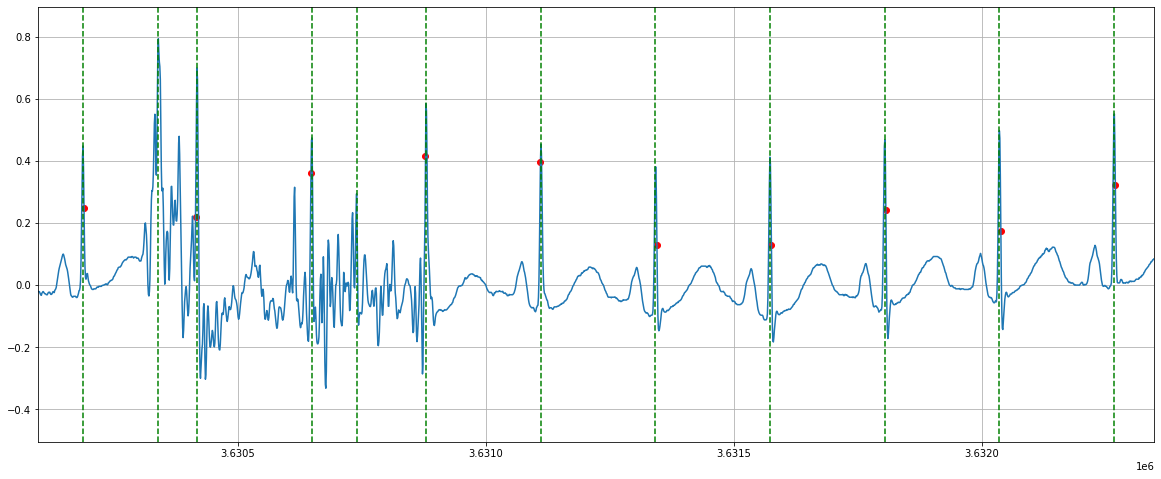

In [134]:
%matplotlib inline

xvals = []
for i, rpeak in ais_rpeaks.iterrows():
    if 3630097.09426868 <= float(rpeak) <= 3632348.9374887235:
        xvals.append(float(rpeak))
yvals = []
for point in xvals:
    #print(float(filtered_scaled[int(point)]))
    yvals.append(float(filtered.loc[point]))

# correct rpeaks 
cvals = []
for i, rpeak in c_rpeaks.iterrows():
    if 3630097.09426868 <= float(rpeak) <= 3632348.9374887235:
        cvals.append(float(rpeak))
cyvals = []
for point in cvals:
    #print(float(filtered_scaled[int(point)]))
    cyvals.append(float(filtered.loc[point]))


    
fig = plt.figure(figsize=(20, 8))
ax = fig.subplots(1)
ax.plot(xvals, yvals, 'ro')
# ax.plot(cval, cyvals, )
ax.plot(filtered)
plt.grid(True)
for c_rpeak in cvals:
    plt.axvline(x=c_rpeak, linestyle='--', c='g')
    
plt.xlim([3630097.094268683,3632348.9374887235])
plt.ylim([-0.5044731554622015, 0.8955336160304317])




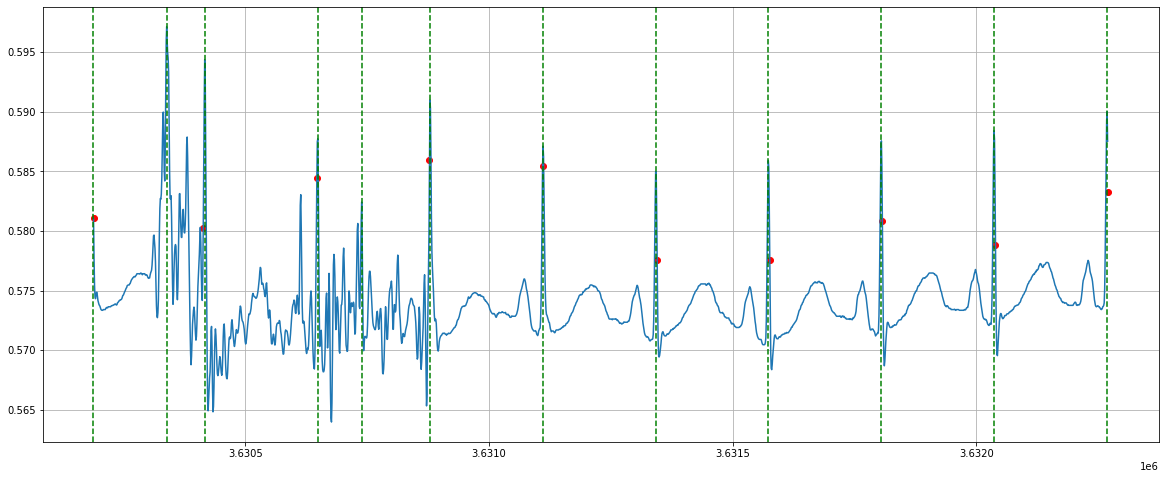

In [133]:
%matplotlib inline

xvals = []
for i, rpeak in ais_rpeaks.iterrows():
    if 3630097.09426868 <= float(rpeak) <= 3632348.9374887235:
        xvals.append(float(rpeak))
yvals = []
for point in xvals:
    #print(float(filtered_scaled[int(point)]))
    yvals.append(float(filtered_scaled[int(point)]))

    
        
fig = plt.figure(figsize=(20, 8))
ax = fig.subplots(1)
ax.plot(xvals, yvals, 'ro')
# ax.plot(cval, cyvals, )
ax.plot(list(range(int(xvals[0]), int(xvals[-1]))), filtered_scaled[list(range(int(xvals[0]), int(xvals[-1])))])

#ax.plot(filtered)
plt.grid(True)
for c_rpeak in cvals:
    plt.axvline(x=c_rpeak, linestyle='--', c='g')
    
# plt.xlim([3630097.094268683,3632348.9374887235])
# plt.ylim([-0.5044731554622015, 0.8955336160304317])



In [ ]:
import os 
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH_IN = r'C:\\Users\\MI2RL-KHJ\\workspace_signal'

files = []
for filename in glob.glob('*.csv'):
    files.append(filename)

#

### Date: 2021.06.30

### MIT DATA

In [14]:
import os 
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH_IN = r'C:\\Users\\MI2RL-KHJ\\workspace_signal'
# C:\Users\MI2RL-KHJ\workspace_signal\physionet\mit_arrhythmia

In [15]:
mit_normal = os.path.join(PATH_IN, 'physionet','mit_normal')

In [16]:
mit_normal = os.path.join(PATH_IN, 'physionet','mit_normal')
df = pd.read_csv(os.path.join(mit_normal, 'ECGs.csv'))
df
PtId = list(set(df['Participant']))
PtId
df_rpeak = pd.read_csv(os.path.join(mit_normal, 'Rpeaks.csv'))
df_rpeak

,Rpeaks,Participant,Sampling_Rate,Database
0,18,MIT-Normal_00,128,MIT-Normal
1,113,MIT-Normal_00,128,MIT-Normal
2,207,MIT-Normal_00,128,MIT-Normal
3,301,MIT-Normal_00,128,MIT-Normal
4,394,MIT-Normal_00,128,MIT-Normal
...,...,...,...,...
87366,460482,MIT-Normal_17,128,MIT-Normal
87367,460553,MIT-Normal_17,128,MIT-Normal
87368,460623,MIT-Normal_17,128,MIT-Normal
87369,460691,MIT-Normal_17,128,MIT-Normal


In [17]:
PtId = list(set(df['Participant']))
PtId

['MIT-Normal_10',
 'MIT-Normal_03',
 'MIT-Normal_12',
 'MIT-Normal_14',
 'MIT-Normal_08',
 'MIT-Normal_11',
 'MIT-Normal_05',
 'MIT-Normal_16',
 'MIT-Normal_00',
 'MIT-Normal_17',
 'MIT-Normal_04',
 'MIT-Normal_13',
 'MIT-Normal_15',
 'MIT-Normal_01',
 'MIT-Normal_06',
 'MIT-Normal_09',
 'MIT-Normal_07',
 'MIT-Normal_02']

In [18]:
df_rpeak = pd.read_csv(os.path.join(mit_normal, 'Rpeaks.csv'))
df_rpeak

,Rpeaks,Participant,Sampling_Rate,Database
0,18,MIT-Normal_00,128,MIT-Normal
1,113,MIT-Normal_00,128,MIT-Normal
2,207,MIT-Normal_00,128,MIT-Normal
3,301,MIT-Normal_00,128,MIT-Normal
4,394,MIT-Normal_00,128,MIT-Normal
...,...,...,...,...
87366,460482,MIT-Normal_17,128,MIT-Normal
87367,460553,MIT-Normal_17,128,MIT-Normal
87368,460623,MIT-Normal_17,128,MIT-Normal
87369,460691,MIT-Normal_17,128,MIT-Normal


In [19]:
rpeak_00 = df_rpeak[df_rpeak['Participant'] == 'MIT-Normal_00']['Rpeaks']

In [20]:
ecg_00 = df[df['Participant'] == 'MIT-Normal_00']['ECG']
xval_ecg_00= df[df['Participant'] == 'MIT-Normal_00']['Sample']

In [21]:
np.save('mit_00', ecg_00)

In [22]:
rpeak_11 = df_rpeak[df_rpeak['Participant'] == 'MIT-Normal_11']['Rpeaks']
ecg_11 = df[df['Participant'] == 'MIT-Normal_11']['ECG']
xval_ecg_11= df[df['Participant'] == 'MIT-Normal_11']['Sample']
np.save('mit_11', ecg_11)

In [12]:
len(rpeak_00), len(ecg_00), len(y_rpeaks_00)

NameError: name 'rpeak_00' is not defined

In [91]:
y_rpeaks_00 = [] 
for i in rpeak_00:
    y_rpeaks_00.append(ecg_00[i])

In [93]:
%matplotlib auto

fig = plt.figure(figsize=(20, 10))
ax = fig.subplots(1)
ax.plot(ecg_00)
ax.plot(rpeak_00, y_rpeaks_00, 'ro') # r-peaks 
ax.grid()

Using matplotlib backend: Qt5Agg


In [126]:
ecg_11 = list(df[df['Participant'] == 'MIT-Normal_11']['ECG'])
xval_ecg_11= df[df['Participant'] == 'MIT-Normal_11']['Sample']
rpeak_11 = df_rpeak[df_rpeak['Participant'] == 'MIT-Normal_11']['Rpeaks']

In [119]:
len(rpeak_11), len(ecg_11)

(5132, 460800)

In [127]:
y_rpeaks_11 = [] 
for i in rpeak_11:
    #print(i, ecg_11[i])
    y_rpeaks_11.append(ecg_11[i])

In [80]:
%matplotlib auto

fig = plt.figure(figsize=(20, 10))
ax = fig.subplots(1)
ax.plot(ecg_11)
ax.plot(rpeak_11, y_rpeaks_11, 'ro') # r-peaks 
ax.grid()

Using matplotlib backend: Qt5Agg


NameError: name 'ecg_11' is not defined

## mit data via biosppy

In [1]:
import os 
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH_IN = r'C:\\Users\\MI2RL-KHJ\\workspace_signal'

files = []
for filename in glob.glob('*.csv'):
    files.append(filename)
    
# load files 
var = []
for i, file in enumerate(files):
    tmp = pd.read_csv(os.path.join(PATH_IN, file), header=None)
    globals()[files[i].split('_test.csv')[0]] = tmp
    var.append(files[i].split('_test.csv')[0])

In [3]:
correct_rpeaks
filtered 
templates 

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,0.007423,0.017436,0.043911,0.044675,-0.007900,-0.046254,-0.026510,-0.013125,-0.030257,-0.019470,...,0.006756,0.015144,0.009159,0.003688,0.012908,0.013576,0.004102,0.002927,0.005925,0.006850
1,0.007201,0.038134,0.058072,0.025413,-0.024947,-0.030693,-0.011138,-0.025509,-0.043965,-0.006271,...,0.024651,0.009472,-0.000446,-0.002716,0.001381,0.006992,0.004179,0.002294,0.007516,0.005441
2,-0.004034,0.006702,-0.006104,-0.019720,-0.004520,0.019769,0.034735,0.047788,0.040741,-0.002849,...,0.018956,0.004249,0.008857,0.022409,0.010384,-0.004382,0.005408,0.009844,-0.004573,-0.012178
3,-0.020536,-0.020927,-0.009833,-0.010125,-0.004550,0.010702,0.024213,0.040178,0.030666,-0.017777,...,0.021192,0.029488,0.016693,0.000500,0.002387,0.004367,-0.006738,-0.012931,-0.007467,-0.002566
4,-0.027725,-0.038785,-0.035082,-0.037732,-0.032277,-0.014662,-0.009646,-0.015480,-0.001688,0.011166,...,-0.009580,-0.013896,-0.003565,0.009065,0.001943,-0.009225,-0.002851,0.003613,-0.003107,-0.007018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,-0.090664,0.003759,0.014479,0.016850,0.050195,0.036124,-0.033185,-0.058796,-0.010399,0.015953,...,0.024005,0.003450,-0.020864,0.037546,0.057108,-0.004892,-0.037038,-0.016109,-0.005836,-0.026119
5153,-0.000890,0.015621,0.058642,0.064277,0.020340,-0.011904,-0.015741,-0.021794,-0.027509,-0.028027,...,0.013200,-0.011155,-0.018938,0.016539,0.077234,0.053006,-0.035906,-0.045503,-0.009319,-0.004856
5154,0.063766,0.074617,-0.025202,-0.028472,0.028539,0.007724,-0.006852,-0.016850,-0.065515,-0.053026,...,0.055728,0.056589,-0.001620,-0.026486,0.004431,0.000760,-0.023928,-0.009735,0.001744,-0.016166
5155,0.003721,-0.000857,0.016908,0.029269,0.024968,0.023659,0.006321,-0.030087,-0.035941,-0.010365,...,0.015542,0.021376,0.015295,-0.002060,0.005718,0.016503,-0.003695,-0.014382,-0.004055,-0.008423


In [4]:
xvals = [] 
for i in correct_rpeaks:
    xvals.append(ts[i])

In [37]:
cr = list(correct_rpeaks[0])

In [59]:
tmp = list(filtered[0][:10000])

In [60]:
yvals = [] 
for i in cr:
    #print(int(i))
    #print(filtered[0][i])
    if i < len(tmp):
        yvals.append(tmp[int(i)])    
    

In [75]:
for i, time in enumerate(ts_tmp):
    if time == 77.6640625:
        print(i)
    

9941


In [70]:
xvals = []
for i in cr:
    if i < len(tmp):
        xvals.append(ts_tmp[int(i)])
        print(ts_tmp[int(i)])

0.125
0.90625
1.6328125
2.328125
3.0625
3.890625
4.59375
5.3359375
6.1015625
6.8515625
7.578125
8.328125
9.0859375
9.890625
10.6484375
11.3671875
12.1015625
12.8671875
13.5625
14.2265625
14.9921875
15.6328125
16.40625
17.1015625
17.84375
18.484375
19.21875
19.90625
20.5703125
21.265625
22.0234375
22.7265625
23.40625
24.2109375
24.9296875
25.6640625
26.40625
27.109375
27.875
28.5703125
29.3046875
29.984375
30.65625
31.3515625
32.0625
32.7578125
33.484375
34.2734375
35.078125
35.875
36.609375
37.234375
37.8984375
38.6171875
39.25
39.84375
40.46875
41.1328125
41.796875
42.5390625
43.3125
44.0859375
44.8515625
45.6640625
46.3359375
46.96875
47.59375
48.234375
48.90625
49.65625
50.4765625
51.3125
52.046875
52.8203125
53.625
54.40625
55.09375
55.890625
56.6171875
57.3046875
58.0546875
58.7109375
59.421875
60.15625
60.90625
61.75
62.4765625
63.234375
63.8359375
64.515625
65.2109375
65.921875
66.6875
67.5625
68.2734375
68.9765625
69.671875
70.3671875
71.09375
71.8203125
72.5390625
73.296875
73

In [67]:
#plt.plot(filtered)

%matplotlib auto

fig = plt.figure(figsize=(20, 10))
ax = fig.subplots(1)
#ax.plot(tmp)
ax.plot(xvals, yvals, 'ro') # r-peaks 
ax.grid()

Using matplotlib backend: Qt5Agg


In [42]:
# original 
# yvals = [] 
# for i in cr:
#     #print(int(i))
#     #print(filtered[0][i])
#     yvals.append(filtered[0][i])    

In [47]:
# original
# xvals = []
# for i in cr:
#     xvals.append(ts[0][int(i)])

In [50]:
%matplotlib auto
plt.plot(xvals[0:1000], xvals[0:1000], 'ro') # r-peaks 

Using matplotlib backend: Qt5Agg


In [78]:
filtered[:9941]
xvals[-1]

77.6640625

In [79]:
#plt.plot(filtered)

%matplotlib auto

fig = plt.figure(figsize=(20, 10))
ax = fig.subplots(1)
ax.plot(ts[:9941], filtered[:9941])
ax.plot(xvals, yvals, 'ro') # r-peaks 
ax.grid()

Using matplotlib backend: Qt5Agg


#

### MIT_11 DATA

In [95]:
import os 
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH_IN = r'C:\\Users\\MI2RL-KHJ\\workspace_signal'

files = []
for filename in glob.glob('*.csv'):
    files.append(filename)
    
# load files 
var = []
for i, file in enumerate(files):
    tmp = pd.read_csv(os.path.join(PATH_IN, file), header=None)
    globals()[files[i].split('_test.csv')[0]] = tmp
    var.append(files[i].split('_test.csv')[0])

In [96]:
var

['correct_rpeaks',
 'correct_rpeaks_test_f2.csv',
 'filtered',
 'raw',
 'rpeaks',
 'templates',
 'ts',
 'ts_tmpl']

In [98]:
tmp = list(filtered[0][:10000])
cr = list(correct_rpeaks[0])

In [100]:
yvals = [] 
for i in cr:
    #print(int(i))
    #print(filtered[0][i])
    if i < len(tmp):
        yvals.append(tmp[int(i)])
        
xvals = []
for i in cr:
    if i < len(tmp):
        xvals.append(ts_tmp[int(i)])
        #print(ts_tmp[int(i)])

In [107]:
for i, time in enumerate(ts_tmp):
    if time == 77.625:
        print(i)

9936


In [108]:
#plt.plot(filtered)

%matplotlib auto

fig = plt.figure(figsize=(20, 10))
ax = fig.subplots(1)
ax.plot(ts[:9936], filtered[:9936])
ax.plot(xvals, yvals, 'ro') # r-peaks 
ax.grid()

Using matplotlib backend: Qt5Agg


#

### MIT_11 DATA

In [ ]:
PtId[0].split('_')[1]
list(df[df['Participant'] == PtId[0]]['ECG'])

In [127]:
PtId[2]#.split('_')[1]

'MIT-Normal_00'

In [137]:
for i, Pt in enumerate(PtId):
    num = str(Pt.split('_')[1])
    globals()['ecg_{}'.format(num)] = list(df[df['Participant'] == PtId[i]]['ECG'])
    np.save('ecg_{}'.format(num), list(df[df['Participant'] == PtId[i]]['ECG']))
    globals()['xvals_{}'.format(num)] = df[df['Participant'] == PtId[i]]['Sample']
    globals()['rpeak_{}'.format(num)] = df_rpeak[df_rpeak['Participant'] == PtId[i]]['Rpeaks']

In [ ]:
ecg_11 = list(df[df['Participant'] == 'MIT-Normal_11']['ECG'])
xval_ecg_11= df[df['Participant'] == 'MIT-Normal_11']['Sample']
rpeak_11 = df_rpeak[df_rpeak['Participant'] == 'MIT-Normal_11']['Rpeaks']

In [121]:
for i in PtId:
    num = PtId[i].split('_')[1]
    ecg = 'ecg_'+ num
    xvals = 'xval_'+num 
    rpeak = 'rpeak_' + num
    ecg = list(df[df['Participant'] == PtId[i]]['ECG'])
    xvals = df[df['Participant'] == PtId[i]]['Sample']

SyntaxError: cannot assign to operator (<ipython-input-121-e4406dedb791>, line 3)

#

### Date: 2021.07.01

##### Arrhythmia data - *.npy 만들기

In [2]:
import os 
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH_IN = r'C:\\Users\\MI2RL-KHJ\\workspace_signal'
# C:\Users\MI2RL-KHJ\workspace_signal\physionet\mit_arrhythmia

In [29]:
mit_arrhythmia = os.path.join(PATH_IN, 'physionet','mit_arrhythmia')
df = pd.read_csv(os.path.join(mit_arrhythmia, 'ECGs.csv'))
PtId = list(set(df['Participant']))
df_rpeak = pd.read_csv(os.path.join(mit_arrhythmia, 'Rpeaks.csv'))

In [ ]:
PtId[0].split('_')[1]
list(df[df['Participant'] == PtId[0]]['ECG'])

In [38]:
Arrhythmia = df[df['Database'] == 'MIT-Arrhythmia']
Arrhythmia_x = df[df['Database'] == 'MIT-Arrhythmia-x']

In [42]:
PtId_Arr = list(set(Arrhythmia['Participant']))
PtId_Arr_x = list(set(Arrhythmia_x['Participant']))

In [46]:
df_rpeak_Arr = df_rpeak[df_rpeak['Database'] == 'MIT-Arrhythmia']
df_rpeak_Arr_x = df_rpeak[df_rpeak['Database'] == 'MIT-Arrhythmia-x']

In [98]:
# for Pt in PtId_Arr:
#     num = str(Pt.split('_')[1])
#     # print(type(Pt))
#     print(Pt)
#     #globals()['ecg_arr_{}'.format(num)] = list(df[df['Participant'] == Pt]['ECG'])
#     np.save('ecg_arr_{}'.format(num), list(df[df['Participant'] == Pt]['ECG']))
#     #globals()['xvals_arr_{}'.format(num)] = df[df['Participant'] == Pt]['Sample']
#     np.save('xvals_arr_{}'.format(num), df[df['Participant'] == Pt]['Sample'])
#     #globals()['rpeak_arr_{}'.format(num)] = df_rpeak[df_rpeak['Participant'] == Pt]['Rpeaks']
#     np.save('rpeak_arr_{}'.format(num), df_rpeak[df_rpeak['Participant'] == Pt]['Rpeaks'])

MIT-Arrhythmia_14
MIT-Arrhythmia_01
MIT-Arrhythmia_03
MIT-Arrhythmia_23
MIT-Arrhythmia_45
MIT-Arrhythmia_32
MIT-Arrhythmia_44
MIT-Arrhythmia_26
MIT-Arrhythmia_37
MIT-Arrhythmia_24
MIT-Arrhythmia_05
MIT-Arrhythmia_35
MIT-Arrhythmia_13
MIT-Arrhythmia_21
MIT-Arrhythmia_33
MIT-Arrhythmia_46
MIT-Arrhythmia_43
MIT-Arrhythmia_12
MIT-Arrhythmia_41
MIT-Arrhythmia_36
MIT-Arrhythmia_39
MIT-Arrhythmia_00
MIT-Arrhythmia_40
MIT-Arrhythmia_06
MIT-Arrhythmia_11
MIT-Arrhythmia_19
MIT-Arrhythmia_25
MIT-Arrhythmia_42
MIT-Arrhythmia_20
MIT-Arrhythmia_04
MIT-Arrhythmia_28
MIT-Arrhythmia_22
MIT-Arrhythmia_02
MIT-Arrhythmia_16
MIT-Arrhythmia_15
MIT-Arrhythmia_08
MIT-Arrhythmia_29
MIT-Arrhythmia_30
MIT-Arrhythmia_34
MIT-Arrhythmia_09
MIT-Arrhythmia_47
MIT-Arrhythmia_10
MIT-Arrhythmia_38
MIT-Arrhythmia_27
MIT-Arrhythmia_31
MIT-Arrhythmia_18
MIT-Arrhythmia_07
MIT-Arrhythmia_17


In [55]:
# file rename 
# import os

# for filename in glob.glob('*.npy'):
#     essen = filename.split('arr')
#     #print(essen)
#     refile = essen[0] + 'arr_' + essen[1]
#     print(refile)    
#     os.rename(filename, refile)

ecg_arr_00.npy
ecg_arr_01.npy
ecg_arr_02.npy
ecg_arr_03.npy
ecg_arr_04.npy
ecg_arr_05.npy
ecg_arr_06.npy
ecg_arr_07.npy
ecg_arr_08.npy
ecg_arr_09.npy
ecg_arr_10.npy
ecg_arr_11.npy
ecg_arr_12.npy
ecg_arr_13.npy
ecg_arr_14.npy
ecg_arr_15.npy
ecg_arr_16.npy
ecg_arr_17.npy
ecg_arr_18.npy
ecg_arr_19.npy
ecg_arr_20.npy
ecg_arr_21.npy
ecg_arr_22.npy
ecg_arr_23.npy
ecg_arr_24.npy
ecg_arr_25.npy
ecg_arr_26.npy
ecg_arr_27.npy
ecg_arr_28.npy
ecg_arr_29.npy
ecg_arr_30.npy
ecg_arr_31.npy
ecg_arr_32.npy
ecg_arr_33.npy
ecg_arr_34.npy
ecg_arr_35.npy
ecg_arr_36.npy
ecg_arr_37.npy
ecg_arr_38.npy
ecg_arr_39.npy
ecg_arr_40.npy
ecg_arr_41.npy
ecg_arr_42.npy
ecg_arr_43.npy
ecg_arr_44.npy
ecg_arr_45.npy
ecg_arr_46.npy
ecg_arr_47.npy


IndexError: list index out of range

In [100]:
Arrhythmia

,ECG,Participant,Sample,Sampling_Rate,Database
0,-0.145,MIT-Arrhythmia_00,0,360,MIT-Arrhythmia
1,-0.145,MIT-Arrhythmia_00,1,360,MIT-Arrhythmia
2,-0.145,MIT-Arrhythmia_00,2,360,MIT-Arrhythmia
3,-0.145,MIT-Arrhythmia_00,3,360,MIT-Arrhythmia
4,-0.145,MIT-Arrhythmia_00,4,360,MIT-Arrhythmia
...,...,...,...,...,...
35951995,-0.390,MIT-Arrhythmia_47,649995,360,MIT-Arrhythmia
35951996,-0.390,MIT-Arrhythmia_47,649996,360,MIT-Arrhythmia
35951997,-0.395,MIT-Arrhythmia_47,649997,360,MIT-Arrhythmia
35951998,-0.380,MIT-Arrhythmia_47,649998,360,MIT-Arrhythmia


In [101]:
os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\arr')
for Pt in PtId_Arr:
    num = str(Pt.split('_')[1])
    # print(type(Pt))
    print(Pt)
    #globals()['ecg_arrx_{}'.format(num)] = list(df[df['Participant'] == Pt]['ECG'])
    np.save('ecg_arr_{}'.format(num), list(Arrhythmia[Arrhythmia['Participant'] == Pt]['ECG']))
    #globals()['xvals_arrx_{}'.format(num)] = Arrhythmia_x[Arrhythmia_x['Participant'] == Pt]['Sample']
    np.save('xvals_arr_{}'.format(num), Arrhythmia[Arrhythmia['Participant'] == Pt]['Sample'])
    #globals()['rpeak_arrx_{}'.format(num)] = df_rpeak_Arr[df_rpeak_Arr['Participant'] == Pt]['Rpeaks']
    np.save('rpeak_arr_{}'.format(num), df_rpeak_Arr[df_rpeak_Arr['Participant'] == Pt]['Rpeaks'])

MIT-Arrhythmia_14
MIT-Arrhythmia_01
MIT-Arrhythmia_03
MIT-Arrhythmia_23
MIT-Arrhythmia_45
MIT-Arrhythmia_32
MIT-Arrhythmia_44
MIT-Arrhythmia_26
MIT-Arrhythmia_37
MIT-Arrhythmia_24
MIT-Arrhythmia_05
MIT-Arrhythmia_35
MIT-Arrhythmia_13
MIT-Arrhythmia_21
MIT-Arrhythmia_33
MIT-Arrhythmia_46
MIT-Arrhythmia_43
MIT-Arrhythmia_12
MIT-Arrhythmia_41
MIT-Arrhythmia_36
MIT-Arrhythmia_39
MIT-Arrhythmia_00
MIT-Arrhythmia_40
MIT-Arrhythmia_06
MIT-Arrhythmia_11
MIT-Arrhythmia_19
MIT-Arrhythmia_25
MIT-Arrhythmia_42
MIT-Arrhythmia_20
MIT-Arrhythmia_04
MIT-Arrhythmia_28
MIT-Arrhythmia_22
MIT-Arrhythmia_02
MIT-Arrhythmia_16
MIT-Arrhythmia_15
MIT-Arrhythmia_08
MIT-Arrhythmia_29
MIT-Arrhythmia_30
MIT-Arrhythmia_34
MIT-Arrhythmia_09
MIT-Arrhythmia_47
MIT-Arrhythmia_10
MIT-Arrhythmia_38
MIT-Arrhythmia_27
MIT-Arrhythmia_31
MIT-Arrhythmia_18
MIT-Arrhythmia_07
MIT-Arrhythmia_17


In [102]:
os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\arrx')
for Pt in PtId_Arr_x:
    num = str(Pt.split('_')[1])
    # print(type(Pt))
    print(Pt)
    #globals()['ecg_arrx_{}'.format(num)] = list(df[df['Participant'] == Pt]['ECG'])
    np.save('ecg_arrx_{}'.format(num), list(Arrhythmia_x[Arrhythmia_x['Participant'] == Pt]['ECG']))
    #globals()['xvals_arrx_{}'.format(num)] = Arrhythmia_x[Arrhythmia_x['Participant'] == Pt]['Sample']
    np.save('xvals_arrx_{}'.format(num), Arrhythmia_x[Arrhythmia_x['Participant'] == Pt]['Sample'])
    #globals()['rpeak_arrx_{}'.format(num)] = df_rpeak_Arr[df_rpeak_Arr['Participant'] == Pt]['Rpeaks']
    np.save('rpeak_arrx_{}'.format(num), df_rpeak_Arr_x[df_rpeak_Arr_x['Participant'] == Pt]['Rpeaks'])

MIT-Arrhythmia_14
MIT-Arrhythmia_45
MIT-Arrhythmia_44
MIT-Arrhythmia_13
MIT-Arrhythmia_21
MIT-Arrhythmia_46
MIT-Arrhythmia_43
MIT-Arrhythmia_12
MIT-Arrhythmia_41
MIT-Arrhythmia_39
MIT-Arrhythmia_40
MIT-Arrhythmia_11
MIT-Arrhythmia_19
MIT-Arrhythmia_42
MIT-Arrhythmia_20
MIT-Arrhythmia_22
MIT-Arrhythmia_16
MIT-Arrhythmia_15
MIT-Arrhythmia_08
MIT-Arrhythmia_09
MIT-Arrhythmia_47
MIT-Arrhythmia_10
MIT-Arrhythmia_38


#

## Date: 2021.07.02

### physionet - normal -> *.npy

In [106]:
import os 
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH_IN = r'C:\\Users\\MI2RL-KHJ\\workspace_signal'
# C:\Users\MI2RL-KHJ\workspace_signal\physionet\mit_arrhythmia

In [107]:
df = pd.read_csv(os.path.join(mit_normal, 'ECGs.csv'))
PtId = list(set(df['Participant']))
df_rpeak = pd.read_csv(os.path.join(mit_normal, 'Rpeaks.csv'))

In [ ]:
PtId[0].split('_')[1]
list(df[df['Participant'] == PtId[0]]['ECG'])

In [109]:
PtId

['MIT-Normal_07',
 'MIT-Normal_02',
 'MIT-Normal_11',
 'MIT-Normal_04',
 'MIT-Normal_10',
 'MIT-Normal_01',
 'MIT-Normal_09',
 'MIT-Normal_14',
 'MIT-Normal_15',
 'MIT-Normal_16',
 'MIT-Normal_17',
 'MIT-Normal_03',
 'MIT-Normal_08',
 'MIT-Normal_06',
 'MIT-Normal_05',
 'MIT-Normal_12',
 'MIT-Normal_13',
 'MIT-Normal_00']

In [111]:
os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\physio_normal')
for Pt in PtId:
    num = str(Pt.split('_')[1])
    # print(type(Pt))
    print(Pt)
    #globals()['ecg_arrx_{}'.format(num)] = list(df[df['Participant'] == Pt]['ECG'])
    np.save('ecg_norm_{}'.format(num), list(df[df['Participant'] == Pt]['ECG']))
    #globals()['xvals_arrx_{}'.format(num)] = Arrhythmia_x[Arrhythmia_x['Participant'] == Pt]['Sample']
    np.save('xvals_norm_{}'.format(num), df[df['Participant'] == Pt]['Sample'])
    #globals()['rpeak_arrx_{}'.format(num)] = df_rpeak_Arr[df_rpeak_Arr['Participant'] == Pt]['Rpeaks']
    np.save('rpeak_norm_{}'.format(num), df_rpeak[df_rpeak['Participant'] == Pt]['Rpeaks'])

MIT-Normal_07
MIT-Normal_02
MIT-Normal_11
MIT-Normal_04
MIT-Normal_10
MIT-Normal_01
MIT-Normal_09
MIT-Normal_14
MIT-Normal_15
MIT-Normal_16
MIT-Normal_17
MIT-Normal_03
MIT-Normal_08
MIT-Normal_06
MIT-Normal_05
MIT-Normal_12
MIT-Normal_13
MIT-Normal_00


#

### MIT DATA: Normal Data - Compare R-peaks (MIT data R-peak vs. Hamilton R-peak)

In [23]:
PATH_IN = os.getcwd()
# mit_rpeak_00 = np.load(os.path.join(PATH_IN, 'rpeak_norm_00.npy')
# mit_rpeak_00 = np.load('rpeak_norm_00.npy')

In [152]:
def rpeak_extraction(raw, filtered, hamilton, mit):
    
    
    # load filtered, raw sample 
    os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_norm')
    filtered_sample = pd.read_csv(filtered, header=None)
    raw_sample = pd.read_csv(raw, header=None)

    # load hamilton rpeak
    hamilton_rpeak = list(pd.read_csv(hamilton, header=None)[0])    
    
    # load mit rpeak 
    os.chdir('C:\\Users\\MI2RL-KHJ\\workspace_signal\\mit\\norm')
    mit_rpeak = np.load(mit)
    
    # raw data + hamilton r-peak
    rh_xvals = []
    rh_yvals = [] 
    rm_xvals = []
    rm_yvals = [] 
    for i, sample in enumerate(list(raw_sample[0])):
        if i <= 10000:
            if i in hamilton_rpeak:
                rh_xvals.append(i)
                rh_yvals.append(sample)
                
            if i in mit_rpeak:
                rm_xvals.append(i)
                rm_yvals.append(sample)
                
    # filtered data + hamilton r-peak
    fh_xvals = []
    fh_yvals = [] 
    fm_xvals = []
    fm_yvals = [] 
    for i, sample in enumerate(filtered_sample[0]):
        if i <= 10000:
            if i in hamilton_rpeak:
                fh_xvals.append(i)
                fh_yvals.append(sample)
                
            if i in mit_rpeak:
                fm_xvals.append(i)
                fm_yvals.append(sample)

    pngname = mit.split('.')[0].split('rpeak_')[1]
    return rh_xvals, rh_yvals, rm_xvals, rm_yvals, fh_xvals, fh_yvals, fm_xvals, fm_yvals, pngname


    #%matplotlib inline
    os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_norm')
    fig = plt.figure(figsize=(20, 8))
    ax = fig.subplots(1)
    ax.plot(filtered[:10000], 'salmon', label='Filtered')
    ax.plot(raw[:10000], 'lightskyblue', linestyle= '--', label='Raw')
    ax.plot(fh_xvals, fh_yvals, 'r+', label='F_Ham')
    ax.plot(rh_xvals, rh_yvals, 'k+', label ='R_Ham')
    ax.plot(fm_xvals, fm_yvals, 'g+', label='F_MIT')
    ax.plot(rm_xvals, rm_yvals, 'b+', label='R_MIT')
    ax.legend()
    plt.grid(True)
    plt.savefig(pngname+'.png')

In [130]:
# Make file name list 
# os.chdir('C:\\Users\\MI2RL-KHJ\\workspace_signal\\mit\\norm')
file_list = os.listdir(os.chdir('C:\\Users\\MI2RL-KHJ\\workspace_signal\\mit\\norm'))
mit_rpeaks = [rpeak for rpeak in file_list if rpeak.startswith("rpeak")]


processed_files = os.listdir(os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_norm'))
raw_lists = [raw for raw in processed_files if raw.startswith('raw')]
filtered_lists = [filtered for filtered in processed_files if filtered.startswith("filtered")]
hamilton_rpeaks = [rpeak for rpeak in processed_files if rpeak.startswith("correct")]

In [151]:
for i in range(len(mit_rpeaks)):
    rpeak_extraction(raw_lists[i], filtered_lists[i], hamilton_rpeaks[i], mit_rpeaks[i])

#

#

In [26]:
len(mit_rpeak_00)

5178

In [27]:
os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_norm')
hamilton_rpeak_00 = list(pd.read_csv('correct_rpeaks_test_norm_ecg_norm_00.csv', header=None)[0])

In [28]:
hamilton_rpeak_00

[116.0,
 209.0,
 298.0,
 392.0,
 498.0,
 588.0,
 683.0,
 781.0,
 877.0,
 970.0,
 1066.0,
 1163.0,
 1266.0,
 1363.0,
 1455.0,
 1549.0,
 1647.0,
 1736.0,
 1821.0,
 1919.0,
 2001.0,
 2100.0,
 2189.0,
 2284.0,
 2366.0,
 2460.0,
 2548.0,
 2633.0,
 2722.0,
 2819.0,
 2909.0,
 2996.0,
 3099.0,
 3191.0,
 3285.0,
 3380.0,
 3470.0,
 3568.0,
 3657.0,
 3751.0,
 3838.0,
 3924.0,
 4013.0,
 4104.0,
 4193.0,
 4286.0,
 4387.0,
 4490.0,
 4592.0,
 4686.0,
 4766.0,
 4851.0,
 4943.0,
 5024.0,
 5100.0,
 5180.0,
 5265.0,
 5350.0,
 5445.0,
 5544.0,
 5643.0,
 5741.0,
 5845.0,
 5931.0,
 6012.0,
 6092.0,
 6174.0,
 6260.0,
 6356.0,
 6461.0,
 6568.0,
 6662.0,
 6761.0,
 6864.0,
 6964.0,
 7052.0,
 7154.0,
 7247.0,
 7335.0,
 7431.0,
 7515.0,
 7606.0,
 7700.0,
 7796.0,
 7904.0,
 7997.0,
 8094.0,
 8171.0,
 8258.0,
 8347.0,
 8438.0,
 8536.0,
 8648.0,
 8739.0,
 8829.0,
 8918.0,
 9007.0,
 9100.0,
 9193.0,
 9285.0,
 9382.0,
 9445.0,
 9545.0,
 9625.0,
 9703.0,
 9782.0,
 9861.0,
 9941.0,
 10096.0,
 10179.0,
 10256.0,
 10335.0

In [29]:
os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_norm')
filtered_00 = pd.read_csv('filtered_test_norm_ecg_norm_00.csv', header=None)

In [63]:
os.listdir(os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_norm'))
raw_00 = pd.read_csv('raw_test_norm_ecg_norm_00.csv', header=None)

In [31]:
norm_filtered_00 = list(filtered_00[0])

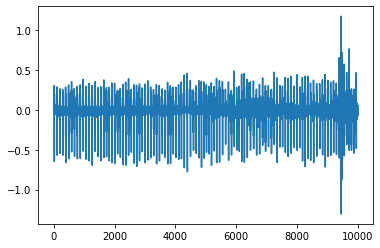

In [32]:
tmp = norm_filtered_00[:10000]

In [75]:
xvals = []
yvals = [] 
for i, sample in enumerate(norm_filtered_00):
    if i <= 10000:
        if i in hamilton_rpeak_00:
            xvals.append(i)
            yvals.append(sample)

In [76]:
mit_xvals = []
mit_yvals = [] 
for i, sample in enumerate(list(raw_00[0])):
    if i <= 10000:
        if i in mit_rpeak_00:
            mit_xvals.append(i)
            mit_yvals.append(sample)

In [82]:
mit2_xvals = []
mit2_yvals = [] 
for i, sample in enumerate(norm_filtered_00):
    if i <= 10000:
        if i in mit_rpeak_00:
            mit2_xvals.append(i)
            mit2_yvals.append(sample)

In [84]:
xvals2 = []
yvals2 = [] 
for i, sample in enumerate(list(raw_00[0])):
    if i <= 10000:
        if i in hamilton_rpeak_00:
            xvals2.append(i)
            yvals2.append(sample)

Using matplotlib backend: Qt5Agg


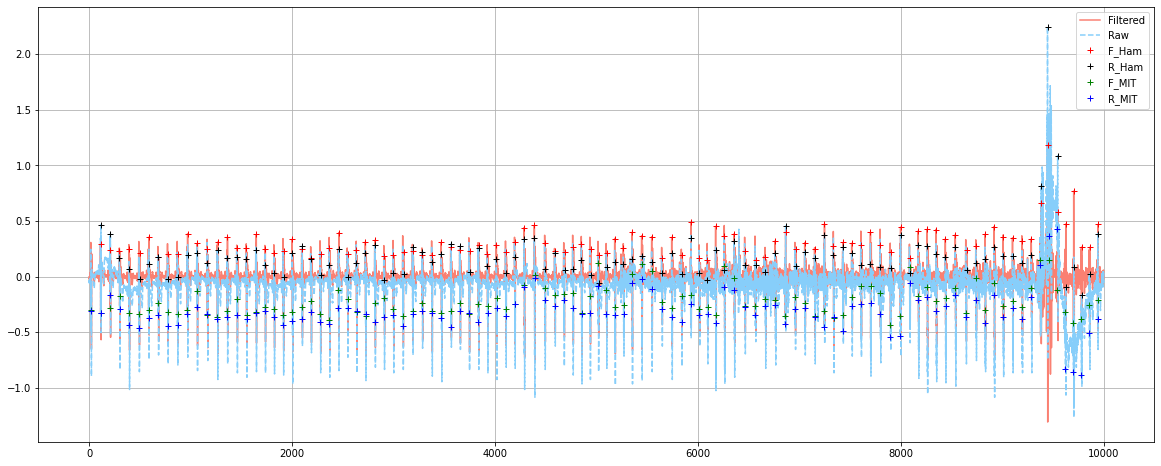

In [91]:
# %matplotlib inline
%matplotlib auto
%matplotlib inline
     
fig = plt.figure(figsize=(20, 8))
ax = fig.subplots(1)
ax.plot(norm_filtered_00[:10000], 'salmon', label='Filtered')
ax.plot(raw_00[:10000], 'lightskyblue', linestyle= '--', label='Raw')
ax.plot(xvals, yvals, 'r+', label='F_Ham')
ax.plot(xvals2, yvals2, 'k+', label ='R_Ham')
ax.plot(mit2_xvals, mit2_yvals, 'g+', label='F_MIT')
ax.plot(mit_xvals, mit_yvals, 'b+', label='R_MIT')
ax.legend()

plt.grid(True)
#plt.xlim([-49227.827211072086,402686.8296796668])
#plt.ylim([-12.561420340969445,14.306622907621016])


In [93]:
hamilton_rpeak_00[:10], mit_rpeak_00[:10]

([116.0, 209.0, 298.0, 392.0, 498.0, 588.0, 683.0, 781.0, 877.0, 970.0],
 array([ 18, 113, 207, 301, 394, 492, 586, 681, 775, 871], dtype=int64))

In [ ]:
os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_norm')
hamilton_rpeak_00 = list(pd.read_csv('correct_rpeaks_test_norm_ecg_norm_00.csv', header=None)[0])

### Date: 2021.07.04

In [155]:
# r-peak 변수로 만들기

os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_norm')
hamilton_rpeak_00 = list(pd.read_csv('correct_rpeaks_test_norm_ecg_norm_00.csv', header=None)[0])

# load mit rpeak 
os.chdir('C:\\Users\\MI2RL-KHJ\\workspace_signal\\mit\\norm')
mit_rpeak_00 = np.load('rpeak_norm_00.npy')

In [158]:
len(mit_rpeak_00), len(hamilton_rpeak_00)

(5178, 5157)

In [201]:
tmp = ['0'+ str(i) for i in range(0,10)]

In [202]:
tmp

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']

In [203]:
tmp2 = [str(i) for i in range(10,18)]

In [204]:
tmp2

['10', '11', '12', '13', '14', '15', '16', '17']

In [205]:
tmp2

['10', '11', '12', '13', '14', '15', '16', '17']

In [208]:
num = tmp + tmp2

In [209]:
num

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17']

In [234]:
for i in num:
    os.listdir(os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_norm'))
    globals()['raw_{}'.format(i)] = pd.read_csv('raw_test_norm_ecg_norm_{}.csv'.format(i), header=None)[0]
    globals()['filtered_{}'.format(i)] = pd.read_csv('filtered_test_norm_ecg_norm_{}.csv'.format(i), header=None)[0]
        
    # hamilton rpeka
    os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_norm')
    globals()['hamilton_rpeak_{}'.format(i)] = pd.read_csv('correct_rpeaks_test_norm_ecg_norm_{}.csv'.format(i), header=None)[0]

    # load mit rpeak 
    os.chdir('C:\\Users\\MI2RL-KHJ\\workspace_signal\\mit\\norm')
    globals()['mit_rpeak_{}'.format(i)] = np.load('rpeak_norm_{}.npy'.format(i))              

In [289]:
hamilton_rpeak_01

0          123.0
1          259.0
2          382.0
3          503.0
4          633.0
          ...   
3723    460153.0
3724    460288.0
3725    460421.0
3726    460553.0
3727    460686.0
Name: 0, Length: 3728, dtype: float64

In [258]:
raw_01.tolist()

[-0.07499999999999998,
 -0.095,
 -0.065,
 -0.055,
 -0.055,
 -0.095,
 -0.085,
 -0.035,
 -0.055,
 -0.065,
 -0.07499999999999998,
 -0.065,
 -0.035,
 -0.045,
 -0.055,
 -0.07499999999999998,
 -0.065,
 -0.065,
 -0.055,
 -0.07499999999999998,
 -0.085,
 -0.045,
 -0.085,
 -0.095,
 -0.085,
 -0.085,
 -0.085,
 -0.095,
 -0.085,
 -0.095,
 -0.115,
 -0.095,
 -0.065,
 -0.045,
 -0.045,
 -0.065,
 -0.045,
 -0.025,
 -0.055,
 -0.045,
 -0.025,
 -0.035,
 -0.055,
 -0.055,
 -0.035,
 -0.045,
 -0.07499999999999998,
 -0.045,
 -0.025,
 -0.045,
 -0.045,
 -0.035,
 -0.025,
 -0.055,
 -0.035,
 -0.055,
 -0.045,
 -0.065,
 -0.055,
 -0.055,
 -0.045,
 -0.055,
 -0.045,
 -0.045,
 -0.045,
 -0.055,
 -0.065,
 -0.015,
 -0.055,
 -0.07499999999999998,
 -0.085,
 -0.025,
 -0.055,
 -0.07499999999999998,
 -0.055,
 -0.045,
 -0.045,
 -0.055,
 -0.055,
 -0.095,
 -0.055,
 -0.065,
 -0.065,
 -0.07499999999999998,
 -0.045,
 -0.055,
 -0.065,
 -0.045,
 -0.055,
 -0.055,
 -0.065,
 -0.035,
 -0.065,
 -0.065,
 -0.095,
 -0.035,
 -0.065,
 -0.045,
 -0.06

In [270]:
x_raw_hamilton = []
y_raw_hamilton = [] 
for i, sample in enumerate(raw_01.tolist()):
    if i <= 10000:
        if i in hamilton_rpeak_01:
            x_raw_hamilton.append(i)
            y_raw_hamilton.append(sample)

In [271]:
x_filtered_hamilton = []
y_filtered_hamilton = [] 
for i, sample in enumerate(filtered_01.tolist()):
    if i <= 10000:
        if i in hamilton_rpeak_01:
            x_filtered_hamilton.append(i)
            y_filtered_hamilton.append(sample)

In [272]:
x_raw_mit = []
y_raw_mit = [] 
for i, sample in enumerate(raw_01.tolist()):
    if i <= 10000:
        if i in mit_rpeak_01:
            x_raw_mit.append(i)
            y_raw_mit.append(sample)

In [273]:
x_filtered_mit = []
y_filtered_mit = [] 
for i, sample in enumerate(filtered_01.tolist()):
    if i <= 10000:
        if i in mit_rpeak_01:
            x_filtered_mit.append(i)
            y_filtered_mit.append(sample)

In [276]:
# %matplotlib inline
%matplotlib auto
#%matplotlib inline
     
fig = plt.figure(figsize=(20, 8))
ax = fig.subplots(1)
ax.plot(raw_01[:10000], 'lightskyblue', linestyle= '--', label='Raw')
ax.plot(filtered_01[:10000], 'salmon', label='Filtered')
ax.plot(x_filtered_hamilton, y_filtered_hamilton, 'r+', label='F_Ham')
ax.plot(x_raw_hamilton, y_raw_hamilton, 'k+', label ='R_Ham')
ax.plot(x_filtered_mit, y_filtered_mit, 'g+', label='F_MIT')
ax.plot(x_raw_mit, y_raw_mit, 'b+', label='R_MIT')
ax.legend()

plt.grid(True)
#plt.xlim([-49227.827211072086,402686.8296796668])
#plt.ylim([-12.561420340969445,14.306622907621016])


Using matplotlib backend: Qt5Agg


In [ ]:
def xy_value(num)
    x_raw_hamilton = []
    y_raw_hamilton = [] 
    for i, sample in enumerate(raw_num.tolist()):
        if i <= 10000:
            if i in hamilton_rpeak_01:
                x_raw_hamilton.append(i)
                y_raw_hamilton.append(sample)

    x_filtered_hamilton = []
    y_filtered_hamilton = [] 
    for i, sample in enumerate(filtered_01.tolist()):
        if i <= 10000:
            if i in hamilton_rpeak_01:
                x_filtered_hamilton.append(i)
                y_filtered_hamilton.append(sample)

    x_raw_mit = []
    y_raw_mit = [] 
    for i, sample in enumerate(raw_01.tolist()):
        if i <= 10000:
            if i in mit_rpeak_01:
                x_raw_mit.append(i)
                y_raw_mit.append(sample)


    x_filtered_mit = []
    y_filtered_mit = [] 
    for i, sample in enumerate(filtered_01.tolist()):
        if i <= 10000:
            if i in mit_rpeak_01:
                x_filtered_mit.append(i)
                y_filtered_mit.append(sample)

In [333]:
for i, sample in enumerate(raw_00.tolist()):
    print(i, sample)
    break

0 -0.035


In [314]:
# def xy_value(raw, filtered, hamilton_rpeak, mit_rpeak):
    
#     x_raw_hamilton = []
#     y_raw_hamilton = [] 
#     for i, sample in enumerate(raw.tolist()):
#         if i <= 10000:
#             if i in hamilton_rpeak:
#                 x_raw_hamilton.append(i)
#                 y_raw_hamilton.append(sample)

#     x_filtered_hamilton = []
#     y_filtered_hamilton = [] 
#     for i, sample in enumerate(filtered.tolist()):
#         if i <= 10000:
#             if i in hamilton_rpeak:
#                 x_filtered_hamilton.append(i)
#                 y_filtered_hamilton.append(sample)

#     x_raw_mit = []
#     y_raw_mit = [] 
#     for i, sample in enumerate(raw.tolist()):
#         if i <= 10000:
#             if i in mit_rpeak:
#                 x_raw_mit.append(i)
#                 y_raw_mit.append(sample)


#     x_filtered_mit = []
#     y_filtered_mit = [] 
#     for i, sample in enumerate(filtered.tolist()):
#         if i <= 10000:
#             if i in mit_rpeak:
#                 x_filtered_mit.append(i)
#                 y_filtered_mit.append(sample)
                
#     # return x_raw_hamilton, y_raw_hamilton, x_filtered_hamilton, y_filtered_hamilton, x_raw_mit, y_raw_mit,  x_filtered_mit,  y_filtered_mit

#     # %matplotlib inline
#     # %matplotlib auto
#     %matplotlib inline

#     fig = plt.figure(figsize=(20, 8))
#     ax = fig.subplots(1)
#     #ax.plot(raw_01[:10000], 'lightskyblue', linestyle= '--', label='Raw')
#     ax.plot(filtered_01[:10000], 'salmon', label='Filtered')
#     ax.plot(x_filtered_hamilton, y_filtered_hamilton, 'r+', label='F_Ham')
#     #ax.plot(x_raw_hamilton, y_raw_hamilton, 'k+', label ='R_Ham')
#     #ax.plot(x_filtered_mit, y_filtered_mit, 'g+', label='F_MIT')
#     #ax.plot(x_raw_mit, y_raw_mit, 'b+', label='R_MIT')
#     ax.legend()


In [390]:
def raw_xy_value(raw, filtered, hamilton_rpeak, mit_rpeak):
    
    x_raw_hamilton = []
    y_raw_hamilton = [] 
    for i in hamilton_rpeak:
        if int(i) <= 10000:
            x_raw_hamilton.append(i)
            y_raw_hamilton.append(raw[i])
            
    x_filtered_hamilton = []
    y_filtered_hamilton = [] 
    for i in hamilton_rpeak:
        if i <= 10000:
            x_filtered_hamilton.append(i)
            y_filtered_hamilton.append(filtered[i])

    x_raw_mit = []
    y_raw_mit = [] 
    for i in mit_rpeak:
        if i <= 10000:
            x_raw_mit.append(i)
            y_raw_mit.append(raw[i])



    x_filtered_mit = []
    y_filtered_mit = [] 
    for i in mit_rpeak:
        if i <= 10000:
            x_filtered_mit.append(i)            
            y_filtered_mit.append(filtered[i])



                
    # return x_raw_hamilton, y_raw_hamilton, x_filtered_hamilton, y_filtered_hamilton, x_raw_mit, y_raw_mit,  x_filtered_mit,  y_filtered_mit

    # %matplotlib inline
    # %matplotlib auto
    %matplotlib inline

    fig = plt.figure(figsize=(20, 8))
    ax = fig.subplots(1)
    ax.plot(raw[:10000], 'lightskyblue', linestyle= '--', label='Raw')
    #ax.plot(filtered[:10000], 'salmon', label='Filtered')
    #ax.plot(x_filtered_hamilton, y_filtered_hamilton, 'r+', label='F_Ham')
    ax.plot(x_raw_hamilton, y_raw_hamilton, 'k+', label ='R_Ham')
    #ax.plot(x_filtered_mit, y_filtered_mit, 'g+', label='F_MIT')
    ax.plot(x_raw_mit, y_raw_mit, 'b+', label='R_MIT')
    ax.legend()
    os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\plot')
    fig.savefig(raw +'.png')



######

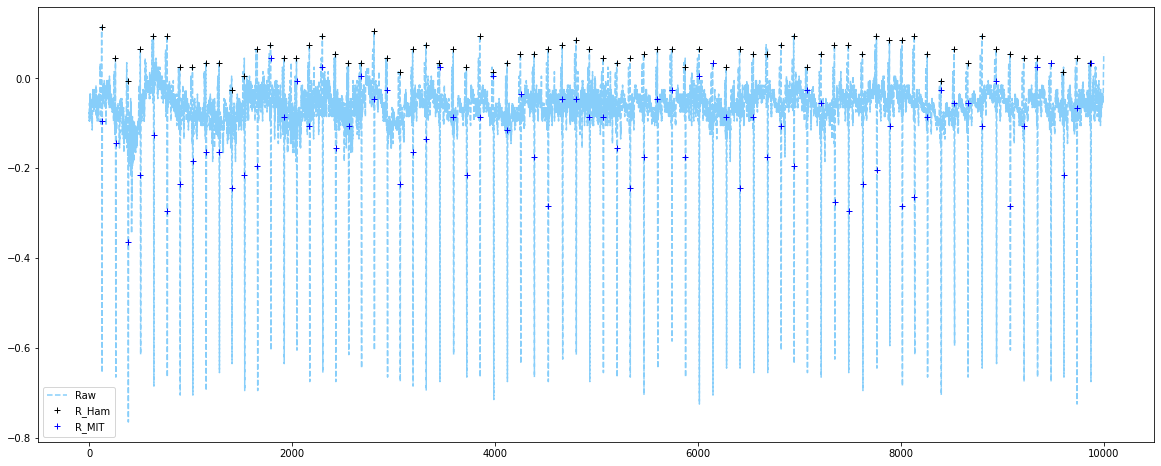

In [357]:
raw_xy_value(raw_01, filtered_01, hamilton_rpeak_01, mit_rpeak_01)

In [439]:
def filtered_xy_value(raw, filtered, hamilton_rpeak, mit_rpeak, num):
    
    x_raw_hamilton = []
    y_raw_hamilton = [] 
    for i in hamilton_rpeak:
        if i <= 10000:
            x_raw_hamilton.append(i)
            y_raw_hamilton.append(raw[i])
            
    x_filtered_hamilton = []
    y_filtered_hamilton = [] 
    for i in hamilton_rpeak:
        if i <= 10000:
            x_filtered_hamilton.append(i)
            y_filtered_hamilton.append(filtered[i])

    x_raw_mit = []
    y_raw_mit = [] 
    for i in mit_rpeak:
        if i <= 10000:
            x_raw_mit.append(i)
            y_raw_mit.append(raw[i])


    x_filtered_mit = []
    y_filtered_mit = [] 
    for i in mit_rpeak:
        if i <= 10000:
            x_filtered_mit.append(i)            
            y_filtered_mit.append(filtered[i])


   
    # return x_raw_hamilton, y_raw_hamilton, x_filtered_hamilton, y_filtered_hamilton, x_raw_mit, y_raw_mit,  x_filtered_mit,  y_filtered_mit

    # %matplotlib inline
#     %matplotlib auto
    %matplotlib inline

    fig = plt.figure(figsize=(20, 8))
    ax = fig.subplots(1)
    #ax.plot(raw[:10000], 'lightskyblue', linestyle= '--', label='Raw')
    ax.plot(filtered[:10000], 'salmon', label='Filtered')
    ax.plot(x_filtered_hamilton, y_filtered_hamilton, 'rx', label='F_Ham')
    #ax.plot(x_raw_hamilton, y_raw_hamilton, 'k+', label ='R_Ham')
    ax.plot(x_filtered_mit, y_filtered_mit, 'g+', label='F_MIT')
    #ax.plot(x_raw_mit, y_raw_mit, 'b+', label='R_MIT')
    ax.legend()
    os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\plot')
    #saved = os.path.join(plot_saved, filtered + '.png')
    saved = 'filtered_' + num + '.png'
    fig.savefig(saved)
    
#    filtered + '.png')


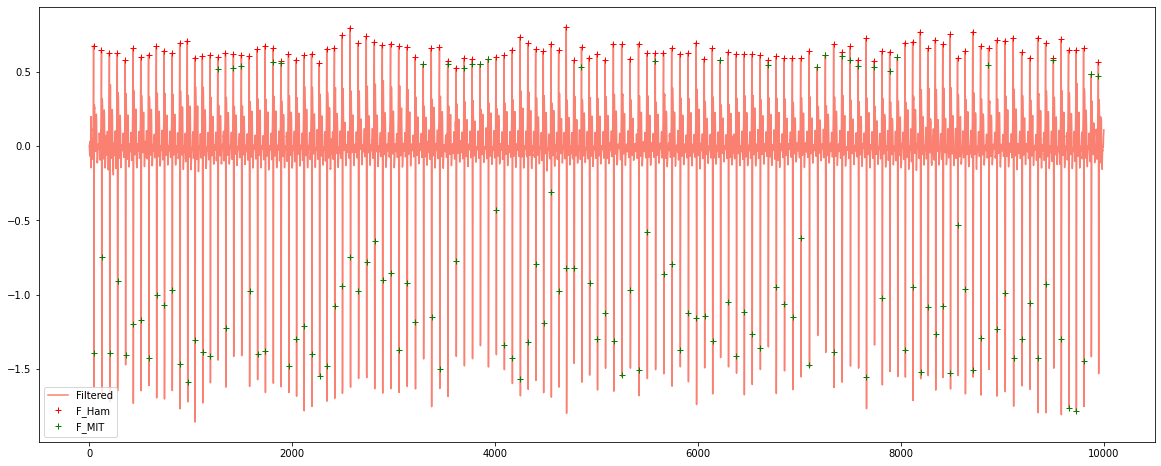

In [427]:
filtered_xy_value(raw_04, filtered_04, hamilton_rpeak_04, mit_rpeak_04, '04')

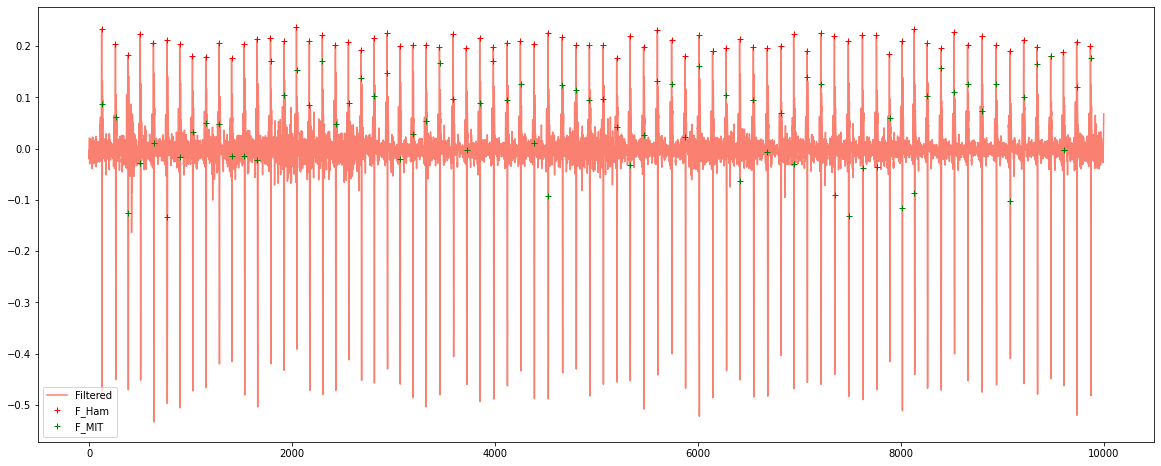

In [359]:
filtered_xy_value(raw_01, filtered_01, hamilton_rpeak_01, mit_rpeak_01)

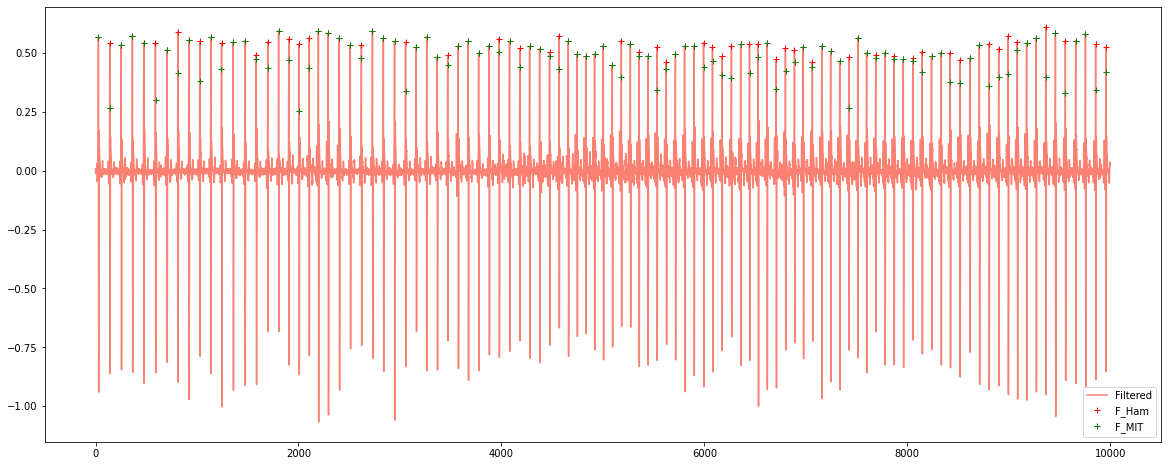

In [367]:
filtered_xy_value(raw_02, filtered_02, hamilton_rpeak_02, mit_rpeak_02)

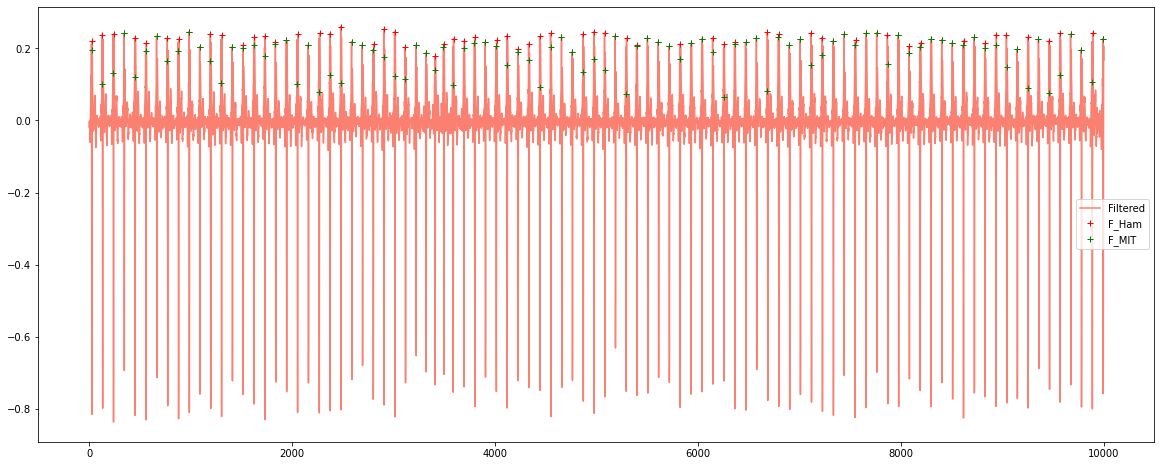

In [403]:
filtered_xy_value(raw_03, filtered_03, hamilton_rpeak_03, mit_rpeak_03)

In [429]:
# for i in num:
#     print('raw_{}'.format(str(i)),',','filtered_{}'.format(str(i)),',', 'hamilton_rpeak_{}'.format(str(i)), ',','mit_rpeak_{}'.format(str(i)))
#     #raw_xy_value('raw_{}'.format(str(i)), 'filtered_{}'.format(str(i)), 'hamilton_rpeak_{}'.format(str(i)),'mit_rpeak_{}'.format(str(i)), i)
#     filtered_xy_value('raw_{}'.format(str(i)),',','filtered_{}'.format(str(i)),',', 'hamilton_rpeak_{}'.format(str(i)), ',','mit_rpeak_{}'.format(str(i)), i)

raw_00 , filtered_00 , hamilton_rpeak_00 , mit_rpeak_00


TypeError: filtered_xy_value() takes 5 positional arguments but 8 were given

In [ ]:
filtered_xy_value('raw_{}'.format(str(i)), 'filtered_{}'.format(str(i)), 'hamilton_rpeak_{}'.format(str(i)), 'mit_rpeak_{}'.format(str(i)))

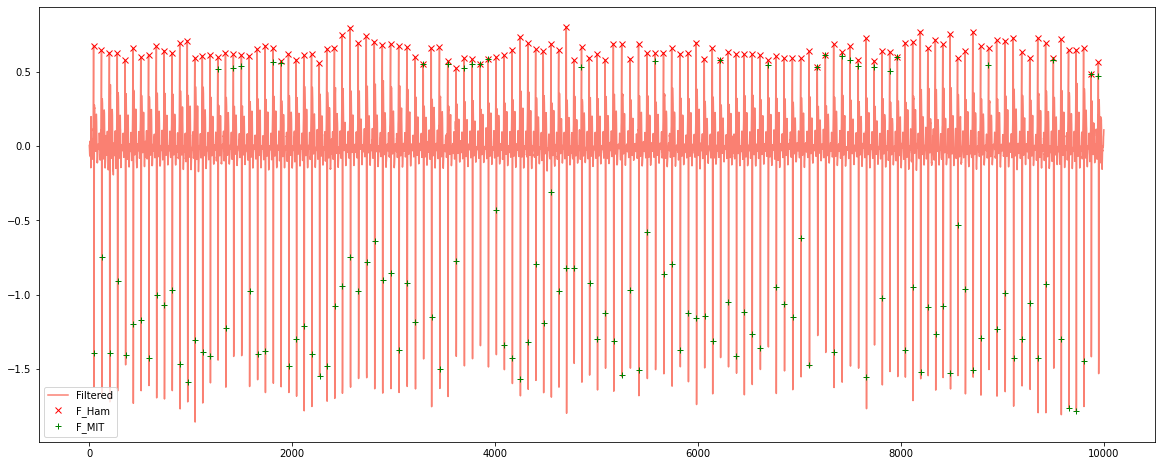

In [440]:
filtered_xy_value(raw_00, filtered_00, hamilton_rpeak_00, mit_rpeak_00, '00')
filtered_xy_value(raw_01, filtered_01, hamilton_rpeak_01, mit_rpeak_01, '01')
filtered_xy_value(raw_02, filtered_02, hamilton_rpeak_02, mit_rpeak_02, '02')
filtered_xy_value(raw_03, filtered_03, hamilton_rpeak_03, mit_rpeak_02, '03')
filtered_xy_value(raw_04, filtered_04, hamilton_rpeak_04, mit_rpeak_04, '04')


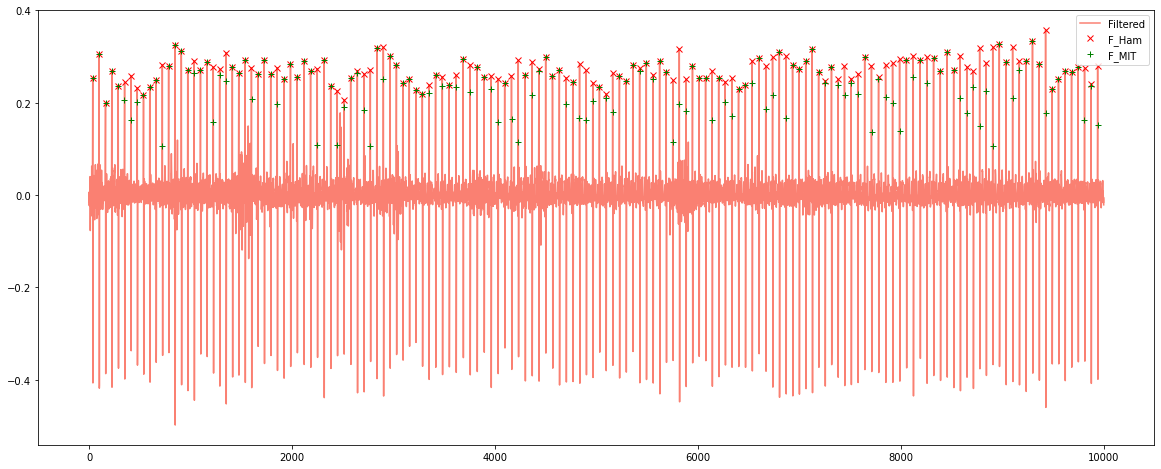

In [441]:
filtered_xy_value(raw_05, filtered_05, hamilton_rpeak_05, mit_rpeak_05, '05')
filtered_xy_value(raw_06, filtered_06, hamilton_rpeak_06, mit_rpeak_06, '06')
filtered_xy_value(raw_07, filtered_07, hamilton_rpeak_07, mit_rpeak_07, '07')
filtered_xy_value(raw_08, filtered_08, hamilton_rpeak_08, mit_rpeak_08, '08')
filtered_xy_value(raw_09, filtered_09, hamilton_rpeak_09, mit_rpeak_09, '09')
filtered_xy_value(raw_10, filtered_10, hamilton_rpeak_10, mit_rpeak_10, '10')
filtered_xy_value(raw_11, filtered_11, hamilton_rpeak_11, mit_rpeak_11, '11')
filtered_xy_value(raw_12, filtered_12, hamilton_rpeak_12, mit_rpeak_12, '12')
filtered_xy_value(raw_13, filtered_13, hamilton_rpeak_13, mit_rpeak_13, '13')
filtered_xy_value(raw_14, filtered_14, hamilton_rpeak_14, mit_rpeak_14, '14')
filtered_xy_value(raw_15, filtered_15, hamilton_rpeak_15, mit_rpeak_15, '15')
filtered_xy_value(raw_16, filtered_16, hamilton_rpeak_16, mit_rpeak_16, '16')
filtered_xy_value(raw_17, filtered_17, hamilton_rpeak_17, mit_rpeak_17, '17')

In [442]:
hamilton_rpeak_00

0          116.0
1          209.0
2          298.0
3          392.0
4          498.0
          ...   
5152    460333.0
5153    460421.0
5154    460509.0
5155    460596.0
5156    460681.0
Name: 0, Length: 5157, dtype: float64

In [443]:
mit_rpeak_00

array([    18,    113,    207, ..., 460594, 460679, 460762], dtype=int64)

In [462]:
hamiltons = [] 
mits = []
for i in num:
    hamilton = 'hamilton_rpeak_{}'.format(i)
    hamilton
    hamiltons.append(len(hamilton))
    
    mit = 'mit_rpeak_{}'.format(i)
    mits.append(len(mit))

#####

In [510]:

hamiltons = []
mits = []
ratios = []

for i in num:
    os.listdir(os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_norm'))
    # globals()['raw_{}'.format(i)] = pd.read_csv('raw_test_norm_ecg_norm_{}.csv'.format(i), header=None)[0]
    # globals()['filtered_{}'.format(i)] = pd.read_csv('filtered_test_norm_ecg_norm_{}.csv'.format(i), header=None)[0]
        
    # hamilton rpeak
    os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_norm')
    hamilton = len(pd.read_csv('correct_rpeaks_test_norm_ecg_norm_{}.csv'.format(i), header=None)[0])
    hamiltons.append(hamilton)

    # load mit rpeak 
    os.chdir('C:\\Users\\MI2RL-KHJ\\workspace_signal\\mit\\norm')
    mit = len(np.load('rpeak_norm_{}.npy'.format(i)))
    mits.append(mit)
    
    ratio = float(hamilton/mit)
    ratios.append(ratio)

In [511]:
pd.DataFrame({'Hamilton':hamiltons, 'MIT': mits, 'H/M': ratios}) ## index=[0])

,Hamilton,MIT,H/M
0,5157,5178,0.995944
1,3728,3643,1.023332
2,4787,4782,1.001046
3,5042,5038,1.000794
4,5542,5541,1.000180
5,3624,3623,1.000276
6,4538,4536,1.000441
7,4394,4395,0.999772
8,5230,5231,0.999809
9,3732,3730,1.000536


In [513]:
# R-R intervals 
hamiltons = []
mits = []
ratios = []

for i in num:
    os.listdir(os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_norm'))
    # globals()['raw_{}'.format(i)] = pd.read_csv('raw_test_norm_ecg_norm_{}.csv'.format(i), header=None)[0]
    # globals()['filtered_{}'.format(i)] = pd.read_csv('filtered_test_norm_ecg_norm_{}.csv'.format(i), header=None)[0]
        
    # hamilton rpeka
    os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_norm')
    hamilton = pd.read_csv('correct_rpeaks_test_norm_ecg_norm_{}.csv'.format(i), header=None)[0]
    break
#     hamiltons.append(hamilton)

#     # load mit rpeak 
#     os.chdir('C:\\Users\\MI2RL-KHJ\\workspace_signal\\mit\\norm')
#     mit = len(np.load('rpeak_norm_{}.npy'.format(i)))
#     mits.append(mit)
    
#     ratio = float(hamilton/mit)
#     ratios.append(ratio)

In [773]:
# hamilton r-r interval

# load hamilton rpeak
os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_norm')
hamilton = pd.read_csv('correct_rpeaks_test_norm_ecg_norm_{}.csv'.format('00'), header=None)[0]

h_intervals = []
for i in range(len(hamilton)):
    if i+1 == len(hamilton):
        print(i)
        break
    interval = hamilton[i+1] - hamilton[i]
    h_intervals.append(interval)

5156


In [775]:
#h_intervals

In [611]:
# mit r-r interval

# load mit rpeak 
os.chdir('C:\\Users\\MI2RL-KHJ\\workspace_signal\\mit\\norm')
mit = np.load('rpeak_norm_{}.npy'.format('00'))
# mits.append(mit)

m_intervals = []
for i in range(len(mit)):
    if i+1 == len(mit):
        print(i)
        break
    interval = mit[i+1] - mit[i]
    m_intervals.append(interval)

5177


In [596]:
# h_intervals, m_intervals 

In [598]:
for i in num:
    os.listdir(os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_norm'))
    raw = pd.read_csv('raw_test_norm_ecg_norm_{}.csv'.format(i), header=None)[0]
    filtered = pd.read_csv('filtered_test_norm_ecg_norm_{}.csv'.format(i), header=None)[0]

In [603]:
tmp_mit = mit.tolist()

In [614]:
len(m_intervals)

5178

In [618]:
# mit table 
mit_table = pd.DataFrame({'sample': tmp_mit, 'raw_value': raw[tmp_mit], 'filtered_value': filtered[tmp_mit], 'R-R interval': m_intervals})
mit_table

,sample,raw_value,filtered_value,R-R interval
18,18,0.005,0.014079,0
113,113,-0.015,-0.000659,95
207,207,0.045,0.005839,94
301,301,-0.025,-0.007667,94
394,394,0.025,0.002993,93
...,...,...,...,...
460419,460419,-0.035,0.036308,88
460507,460507,0.015,-0.000149,88
460594,460594,-0.025,-0.010112,87
460679,460679,0.015,-0.004849,85


In [782]:
#h_intervals#.insert(0,0)

In [783]:
# hamilton table 

hamilton_table = pd.DataFrame({'sample': hamilton.tolist(), 'raw_value': raw[hamilton.tolist()], 'filtered_value': filtered[hamilton.tolist()], 'R-R interval': h_intervals})


In [784]:
hamilton_table, mit_table

(            sample  raw_value  filtered_value  R-R interval
 116.0        116.0      0.465        0.288712           0.0
 209.0        209.0      0.385        0.241006          93.0
 298.0        298.0      0.165        0.229406          89.0
 392.0        392.0      0.065        0.250458          94.0
 498.0        498.0     -0.025        0.207779         106.0
 ...            ...        ...             ...           ...
 460333.0  460333.0      0.665        0.668096          90.0
 460421.0  460421.0      0.335        0.589083          88.0
 460509.0  460509.0      0.535        0.755520          88.0
 460596.0  460596.0      0.805        0.789127          87.0
 460681.0  460681.0      0.665        0.665544          85.0
 
 [5157 rows x 4 columns],
         sample  raw_value  filtered_value  R-R interval
 18          18      0.005        0.014079             0
 113        113     -0.015       -0.000659            95
 207        207      0.045        0.005839            94
 301        

In [718]:
hamilton_table.describe()

,sample,raw_value,filtered_value,R-R interval
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,231474.648245,0.010226,0.001277,89.308707
std,134494.495575,0.096841,0.083135,15.506990
min,116.000000,-1.085000,-0.507911,0.000000
25%,113194.000000,-0.015000,-0.008436,81.000000
50%,230782.000000,0.015000,0.003059,89.000000
75%,349504.000000,0.045000,0.017769,96.000000
max,460681.000000,0.365000,0.397517,295.000000


In [740]:
hamilton_table['R-R interval'].iloc[1:].describe(), mit_table['R-R interval'].iloc[1:].describe()

(count    5156.000000
 mean       89.326028
 std        15.458520
 min        13.000000
 25%        81.000000
 50%        89.000000
 75%        96.000000
 max       295.000000
 Name: R-R interval, dtype: float64,
 count    5177.000000
 mean       88.998262
 std        28.147358
 min        59.000000
 25%        81.000000
 50%        88.000000
 75%        96.000000
 max      1590.000000
 Name: R-R interval, dtype: float64)

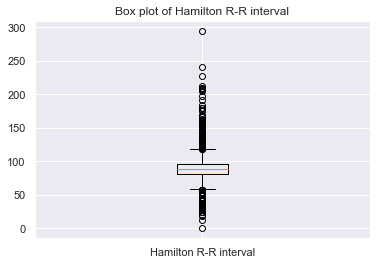

In [722]:
%matplotlib inline
plt.boxplot(hamilton_table['R-R interval'][1:]) , #vert=0)
plt.title('Box plot of Hamilton R-R interval')
plt.xticks([1],['Hamilton R-R interval'])
plt.show()

In [733]:
hamilton_table['R-R interval'] ##:][1:]

116.0         0.0
209.0        93.0
298.0        89.0
392.0        94.0
498.0       106.0
            ...  
460333.0     90.0
460421.0     88.0
460509.0     88.0
460596.0     87.0
460681.0     85.0
Name: R-R interval, Length: 5157, dtype: float64

In [654]:
hamilton_table['R-R interval'], mit_table['R-R interval']

(116.0         0.0
 209.0        93.0
 298.0        89.0
 392.0        94.0
 498.0       106.0
             ...  
 460333.0     90.0
 460421.0     88.0
 460509.0     88.0
 460596.0     87.0
 460681.0     85.0
 Name: R-R interval, Length: 5157, dtype: float64,
 18         0
 113       95
 207       94
 301       94
 394       93
           ..
 460419    88
 460507    88
 460594    87
 460679    85
 460762    83
 Name: R-R interval, Length: 5178, dtype: int64)

In [653]:
import seaborn as sns

sns.boxplot(data=hamilton_table['R-R interval'], mit_table['R-R interval'])

SyntaxError: positional argument follows keyword argument (<ipython-input-653-7cb14d22f23f>, line 3)

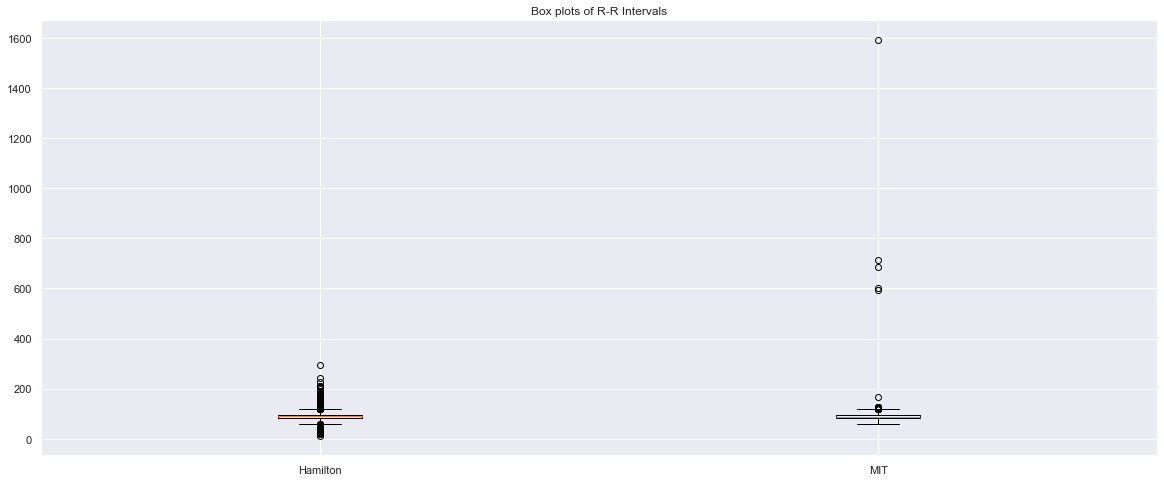

In [786]:
fig = plt.figure(figsize=(20, 8))
ax = fig.subplots(1)
#fig, ax = plt.subplots()
ax.boxplot([hamilton_table['R-R interval'].iloc[1:], mit_table['R-R interval'].iloc[1:]])#, sym="b*")
plt.title('Box plots of R-R Intervals')
plt.xticks([1, 2], ['Hamilton', 'MIT'])
plt.show()

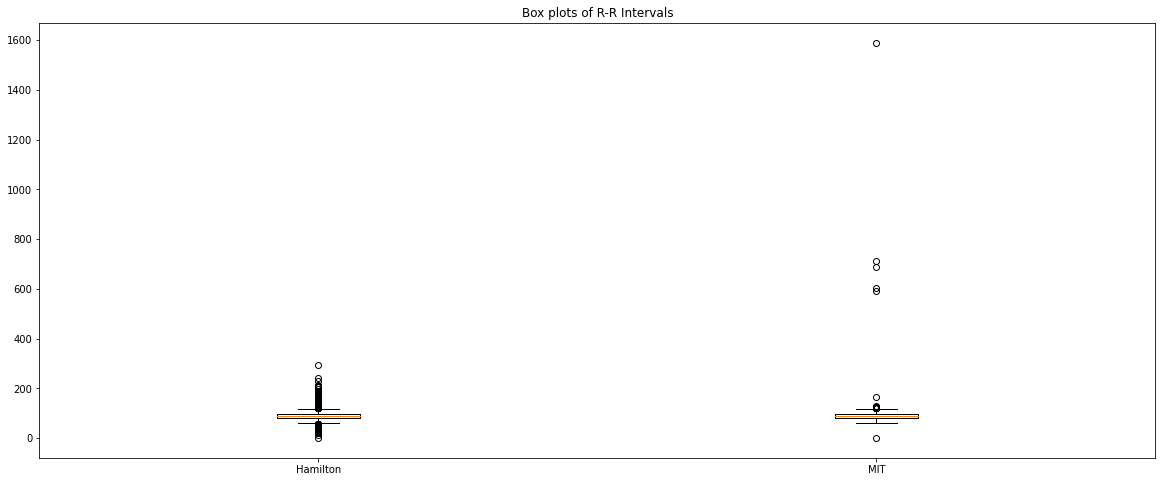

In [657]:
fig = plt.figure(figsize=(20, 8))
ax = fig.subplots(1)
#fig, ax = plt.subplots()
ax.boxplot([hamilton_table['R-R interval'], mit_table['R-R interval']])#, sym="b*")
plt.title('Box plots of R-R Intervals')
plt.xticks([1, 2], ['Hamilton', 'MIT'])
plt.show()

In [688]:
import seaborn as sns

%matplotlib auto
plt.figure(figsize=(20, 8))
sns.displot(hamilton_table['R-R interval'])
sns.displot(mit_table['R-R interval'])
#sns.displot(rr)

Using matplotlib backend: Qt5Agg


In [682]:
# ham_dist = np.median(hamilton_table['R-R interval'])
# mit_dist = np.median(mit_table['R-R interval'])

In [686]:
# from scipy.spatial import distance
# ham_ecl = distance.euclidean(hamilton_table['R-R interval'], ham_dist)
# mit_ecl = distance.euclidean(mit_table['R-R interval'], mit_dist)
# ham_ecl, mit_ecl

(1113.704628705475, 2028.2287839393266)

In [787]:
# median 
ham_dist = np.median(hamilton_table['R-R interval'].iloc[1:])
mit_dist = np.median(mit_table['R-R interval'].iloc[1:])

from scipy.spatial import distance
ham_ecl = distance.euclidean(hamilton_table['R-R interval'].iloc[1:], ham_dist)
mit_ecl = distance.euclidean(mit_table['R-R interval'].iloc[1:], mit_dist)
ham_ecl, mit_ecl

(1110.1427836093878, 2026.3188297994964)

In [699]:
summary = pd.DataFrame({'hamilton_table': hamilton_table['R-R interval'].describe(), 'mit_table': mit_table['R-R interval'].describe()})
summary

,hamilton_table,mit_table
count,5157.000000,5178.000000
mean,89.308707,88.981074
std,15.506990,28.171802
min,0.000000,0.000000
25%,81.000000,81.000000
50%,89.000000,88.000000
75%,96.000000,96.000000
max,295.000000,1590.000000


In [712]:
#ecl = {'hamilton_table':ham_ecl, 'mit_table':mit_ecl}
summary.loc['Euclidean'] = [ham_ecl, mit_ecl]

In [715]:
summary.loc['Median'] = [ham_dist, mit_dist]

In [716]:
summary

,hamilton_table,mit_table
count,5157.000000,5178.000000
mean,89.308707,88.981074
std,15.506990,28.171802
min,0.000000,0.000000
25%,81.000000,81.000000
50%,89.000000,88.000000
75%,96.000000,96.000000
max,295.000000,1590.000000
Euclidean,1113.704629,2028.228784
Median,89.000000,88.000000


In [742]:
os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_norm')
filtered_00 = pd.read_csv('filtered_test_norm_ecg_norm_00.csv', header=None)

In [744]:
filtered_value

NameError: name 'filtered_value' is not defined

In [747]:
for i in num:
    os.listdir(os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_norm'))
    raw = pd.read_csv('raw_test_norm_ecg_norm_{}.csv'.format(i), header=None)[0]
    filtered = pd.read_csv('filtered_test_norm_ecg_norm_{}.csv'.format(i), header=None)[0]
    break

In [753]:
filtered_summary = pd.DataFrame({'Hamilton':filtered[hamilton].describe(), 'MIT': filtered[mit].describe()})

In [757]:
total_summary = pd.DataFrame({'Hamilton_value':filtered[hamilton].describe(), 'MIT_value': filtered[mit].describe(), 'Hamilton_R-R interval': hamilton_table['R-R interval'][1:].describe(), 'MIT_R-R interval': mit_table['R-R interval'][1:].describe()})

In [758]:
total_summary

,Hamilton_value,MIT_value,Hamilton_R-R interval,MIT_R-R interval
count,5157.000000,5178.000000,5157.000000,5177.000000
mean,0.463561,-0.292664,89.308707,88.998262
std,0.192742,0.155050,15.506990,28.147358
min,0.114671,-1.275031,0.000000,59.000000
25%,0.311511,-0.394418,81.000000,81.000000
50%,0.428850,-0.311435,89.000000,88.000000
75%,0.586887,-0.204629,96.000000,96.000000
max,1.757368,0.904823,295.000000,1590.000000


In [768]:
hamilton_table['R-R interval'][4:]
#mit_table['R-R interval'][1:]

116.0         0.0
209.0        93.0
298.0        89.0
392.0        94.0
498.0       106.0
            ...  
460333.0     90.0
460421.0     88.0
460509.0     88.0
460596.0     87.0
460681.0     85.0
Name: R-R interval, Length: 5157, dtype: float64

In [771]:
hamilton_table['R-R interval'] = hamilton_table['R-R interval'].tolist()

In [772]:
hamilton_table['R-R interval']

116.0       0.0
209.0       0.0
298.0       0.0
392.0       0.0
498.0       0.0
           ... 
460333.0    0.0
460421.0    0.0
460509.0    0.0
460596.0    0.0
460681.0    0.0
Name: R-R interval, Length: 5157, dtype: float64

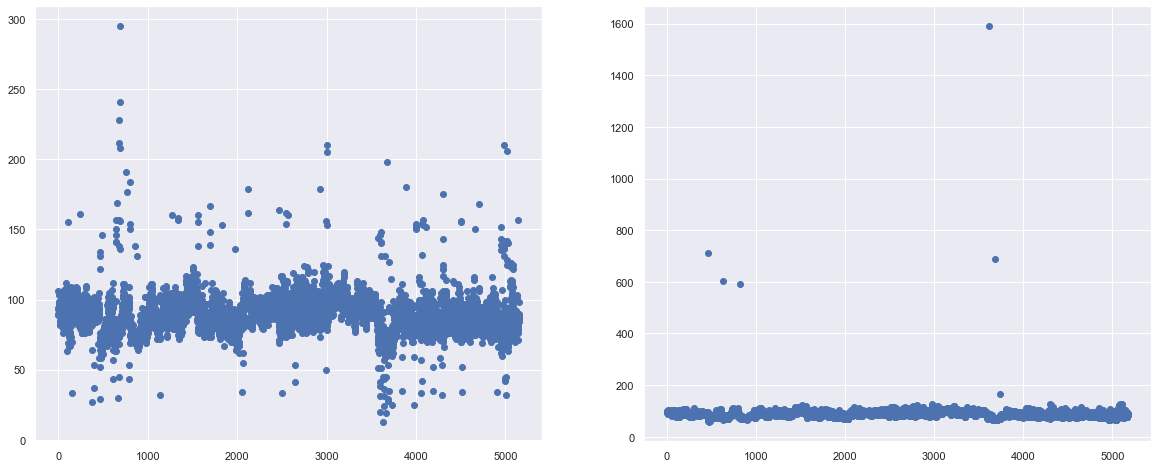

In [809]:
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(121)
ax1.scatter(range(len(hamilton_table['R-R interval'].iloc[1:])), hamilton_table['R-R interval'].iloc[1:])
ax2 = fig.add_subplot(1,2,2)
ax2.scatter(range(len(mit_table['R-R interval'].iloc[1:])), mit_table['R-R interval'].iloc[1:])

[None,
 Text(0.5, 1.0, 'MIT R-R interval'),
 Text(0.5, 0, 'Distribution of R-R interval'),
 Text(0, 0.5, 'Value'),
 []]

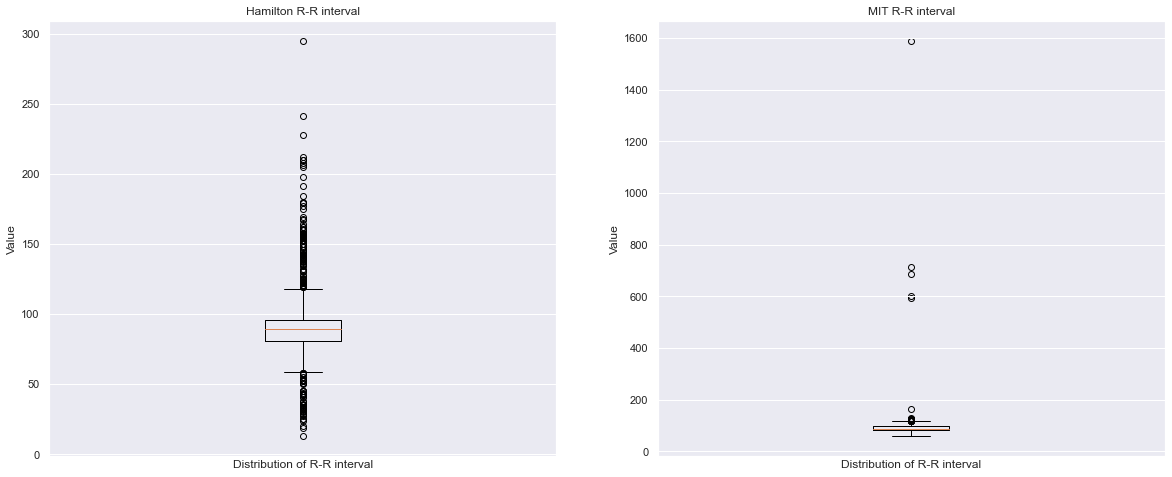

In [875]:
%matplotlib inline
box_colors = ['darkkhaki', 'royalblue']

fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(121)
bplot1 = ax1.boxplot(hamilton_table['R-R interval'].iloc[1:])
ax1.set(axisbelow=True,  # Hide the grid behind plot objects
    title='Hamilton R-R interval',
    xlabel='Distribution of R-R interval',
    ylabel='Value',
    xticks = [])


ax2 = fig.add_subplot(1,2,2)
bplot2 = ax2.boxplot(mit_table['R-R interval'].iloc[1:])
#ax2.xticks([1], ['Hamilton'])
ax2.set(axisbelow=False,  # Hide the grid behind plot objects
    title='MIT R-R interval',
    xlabel='Distribution of R-R interval',
    ylabel='Value',
    xticks = [])


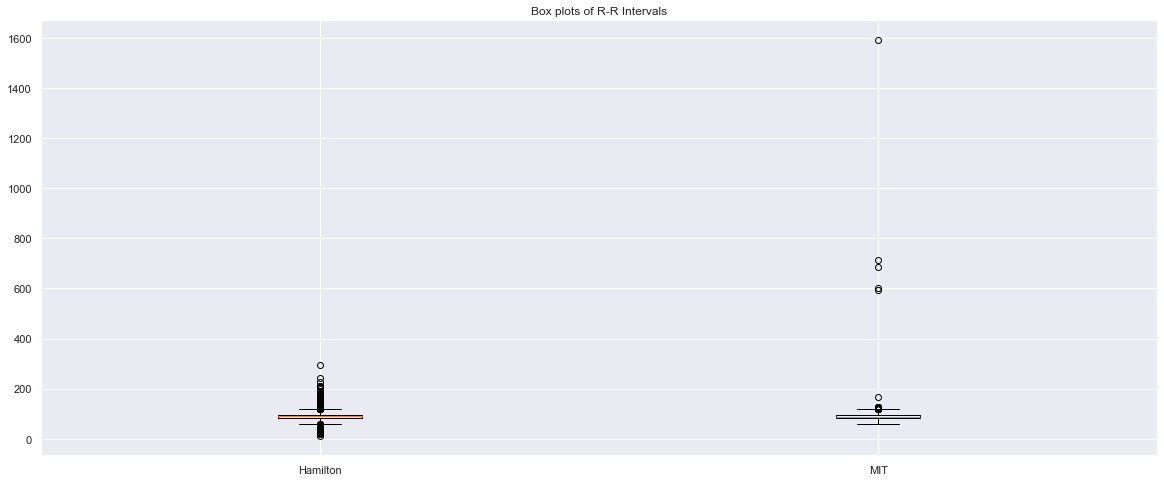

In [851]:
fig = plt.figure(figsize=(20, 8))
ax = fig.subplots(1)
#fig, ax = plt.subplots()
ax.boxplot([hamilton_table['R-R interval'].iloc[1:], mit_table['R-R interval'].iloc[1:]])#, sym="b*")
plt.title('Box plots of R-R Intervals')
plt.xticks([1, 2], ['Hamilton', 'MIT'])
plt.show()